correct tickers from CRSP

# 1) Setup

## 1a) Library functions

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from datetime import datetime, timedelta
from copy import copy

print("done")

done


## 1b) Helper functions

In [2]:
def ListUnion(l1, l2):
    union = list(set(l1) | set(l2))
    return union

# 2) CRSP Permnos
- https://wrds-www.wharton.upenn.edu/data-dictionary/crsp_a_indexes/dsp500list/
- Log in to the SAS cloud and navigate to: /wrds/crsp/sasdata/a_indexes/dsp500list.sas7bdat
- convert permnos to IBES tickers here https://wrds-www.wharton.upenn.edu/pages/get-data/linking-suite-wrds/ibes-crsp-link/

## 2b) more comprehensive ticker names
- All from WRDS: https://wrds-www.wharton.upenn.edu/data-dictionary/crsp_a_indexes/dsp500list/
- Go to wrds > crsp > a_stock, a_index, a_cc
- Get dsp500list.sas7bdat, dsenames.sas7bdat, ccmxpf_linktable.sas7bdat
- or monthly equivalent
- Note: using the TICKERS - although non-unique, will get you more complete data from WRDS/Compustat etc

## 2c) Create Linktable

In [132]:
#Get permnos for sp500 index members
msp500list = pd.read_sas("CorrectMembers/msp500list.sas7bdat")
msp500_trimmed = msp500list[(msp500list["ending"] >= "2000-01-01")]
#Get company identifiers
msenames = pd.read_sas("CorrectMembers/msenames.sas7bdat")
msenames_trimmed = msenames[["PERMNO","NAMEDT","NAMEENDT","TICKER","COMNAM","TSYMBOL","NCUSIP"]]
msenames_trimmed.rename(columns={'NCUSIP':'CUSIP', "permno":"PERMNO"}, inplace=True)
msenames_trimmed["TICKER"] = msenames["TICKER"].astype(str).str[2:-1]
msenames_trimmed["TSYMBOL"] = msenames["TSYMBOL"].astype(str).str[2:-1]
msenames_trimmed["COMNAM"] = msenames["COMNAM"].astype(str).str[2:-1]
msenames_trimmed["CUSIP"] = msenames["CUSIP"].astype(str).str[2:-1]
msenames_trimmed = msenames_trimmed[(msenames_trimmed["NAMEENDT"] >= "2000-01-01")]
#merge
msp500 = pd.merge(msp500_trimmed, msenames_trimmed, how = 'left', on = 'PERMNO')
msp500["PERMNO"] = msp500["PERMNO"].astype(int)
msp500

C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\pyliu\AppData\Local\Temp/ipykernel_71408/3297193785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msenames_trimmed["TICKER"] = msenames["TICKER"].astype(str).str[2:-1]
C:\Users\pyliu\AppData\Local\Temp/ipykernel_71408/3297193785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,PERMNO,start,ending,NAMEDT,NAMEENDT,TICKER,COMNAM,TSYMBOL,CUSIP
0,10078,1992-08-20,2010-01-28,1986-03-04,2004-06-09,SUNW,SUN MICROSYSTEMS INC,SUNW,86681020
1,10078,1992-08-20,2010-01-28,2004-06-10,2007-08-26,SUNW,SUN MICROSYSTEMS INC,SUNW,86681020
2,10078,1992-08-20,2010-01-28,2007-08-27,2007-11-11,JAVA,SUN MICROSYSTEMS INC,JAVA,86681020
3,10078,1992-08-20,2010-01-28,2007-11-12,2007-12-10,JAVA,SUN MICROSYSTEMS INC,JAVAD,86681020
4,10078,1992-08-20,2010-01-28,2007-12-11,2010-01-26,JAVA,SUN MICROSYSTEMS INC,JAVA,86681020
...,...,...,...,...,...,...,...,...,...
5172,93429,2017-03-01,2021-12-31,2017-10-18,2018-09-16,CBOE,C B O E GLOBAL MARKETS INC,CBOE,12503M10
5173,93429,2017-03-01,2021-12-31,2018-09-17,2021-03-28,CBOE,C B O E GLOBAL MARKETS INC,CBOE,12503M10
5174,93429,2017-03-01,2021-12-31,2021-03-29,2021-12-31,CBOE,C B O E GLOBAL MARKETS INC,CBOE,12503M10
5175,93436,2020-12-21,2021-12-31,2010-06-29,2017-02-01,TSLA,TESLA MOTORS INC,TSLA,88160R10


In [187]:
test = msp500.drop_duplicates(["PERMNO","start","ending"])
print(len(test[test.duplicated("PERMNO", keep = False)]))
test[test.duplicated("PERMNO", keep = False)]

48


,PERMNO,start,ending,NAMEDT,NAMEENDT,TICKER,COMNAM,TSYMBOL,CUSIP
199,11896,2000-05-10,2007-09-26,1988-02-29,2004-06-09,MXIM,MAXIM INTEGRATED PRODUCTS INC,MXIM,57772K10
203,11896,2018-12-03,2021-08-27,1988-02-29,2004-06-09,MXIM,MAXIM INTEGRATED PRODUCTS INC,MXIM,57772K10
268,12431,1957-03-01,2009-06-30,1968-01-02,2001-08-23,IR,INGERSOLL RAND CO,,G8994E10
279,12431,2010-11-17,2021-12-31,1968-01-02,2001-08-23,IR,INGERSOLL RAND CO,,G8994E10
340,12650,1999-04-05,2000-07-12,1968-01-02,2000-07-12,KSU,KANSAS CITY SOUTHERN INDS INC,,48517030
345,12650,2013-05-24,2021-12-13,1968-01-02,2000-07-12,KSU,KANSAS CITY SOUTHERN INDS INC,,48517030
676,16431,2016-11-10,2016-11-10,2016-11-10,2021-12-31,LW,LAMB WESTON HOLDINGS INC,LW,51327210
677,16431,2018-12-03,2021-12-31,2016-11-10,2021-12-31,LW,LAMB WESTON HOLDINGS INC,LW,51327210
842,19166,1964-02-20,2001-12-31,1986-05-28,2001-01-31,FMC,F M C CORP,,30249130
849,19166,2009-08-19,2021-12-31,1986-05-28,2001-01-31,FMC,F M C CORP,,30249130


In [137]:
curr_date = "2015-01-01"
msp500[(msp500["start"] < curr_date) & (msp500["ending"] > curr_date) & (msp500["NAMEDT"] < curr_date) & (msp500["NAMEENDT"] > curr_date)]

,PERMNO,start,ending,NAMEDT,NAMEENDT,TICKER,COMNAM,TSYMBOL,CUSIP
7,10104,1989-08-03,2021-12-31,2013-07-15,2021-12-31,ORCL,ORACLE CORP,ORCL,68389X10
9,10107,1994-06-07,2021-12-31,2004-06-10,2021-12-31,MSFT,MICROSOFT CORP,MSFT,59491810
19,10138,1999-10-13,2021-12-31,2006-06-30,2015-01-28,TROW,T ROWE PRICE GROUP INC,TROW,74144T10
25,10145,1925-12-31,2021-12-31,2014-01-27,2017-01-29,HON,HONEYWELL INTERNATIONAL INC,HON,43851610
32,10147,1996-03-28,2016-09-07,2004-06-10,2016-09-06,EMC,E M C CORP MA,EMC,26864810
...,...,...,...,...,...,...,...,...,...
5146,92988,2009-09-01,2015-03-17,2009-09-01,2015-03-16,CFN,CAREFUSION CORP,CFN,14170T10
5147,93002,2014-05-08,2021-12-31,2009-08-06,2016-01-31,AVGO,AVAGO TECHNOLOGIES LTD,AVGO,11135F10
5158,93096,2012-12-03,2021-12-31,2014-03-14,2020-02-10,DG,DOLLAR GENERAL CORP NEW,DG,25667710
5162,93159,2012-07-31,2016-03-29,2012-05-22,2019-04-10,ESV,E N S C O PLC NEW,ESV,G9402V10


In [214]:
msp500_unique = msp500.drop_duplicates(["PERMNO","start","ending"])
msp500_unique = msp500_unique[["PERMNO", "start", "ending", "NAMEDT","NAMEENDT","CUSIP","TICKER"]]
msp500_unique

,PERMNO,start,ending,NAMEDT,NAMEENDT,CUSIP,TICKER
0,10078,1992-08-20,2010-01-28,1986-03-04,2004-06-09,86681020,SUNW
5,10104,1989-08-03,2021-12-31,1995-06-01,2004-06-09,68389X10,ORCL
8,10107,1994-06-07,2021-12-31,1986-03-13,2004-06-09,59491810,MSFT
10,10108,2002-07-22,2005-08-11,1997-06-04,2002-01-01,86736310,SDS
13,10137,2000-12-11,2011-02-25,1997-10-01,2002-01-01,01736110,AYE
...,...,...,...,...,...,...,...
5162,93159,2012-07-31,2016-03-29,2012-05-22,2019-04-10,G9402V10,ESV
5165,93246,2021-03-22,2021-12-31,2010-02-11,2021-12-31,36873610,GNRC
5166,93422,2010-07-01,2015-06-30,2010-07-01,2010-10-13,74733V10,QEP
5171,93429,2017-03-01,2021-12-31,2010-06-15,2017-10-17,12503M10,CBOE


In [189]:
#create list of unique permno
with open("FinalMembers/SPX_PERMNO.txt", 'w') as f:
    for item in msp500list["PERMNO"]:
        f.write("%s\n" % int(item))
print("done")

done


In [190]:
#create list of unique ticker
msp_permnos = msp500.drop_duplicates("TICKER")
with open("FinalMembers/SPX_TICKER.txt", 'w') as f:
    for item in msp_permnos["TICKER"]:
        f.write("%s\n" % item)
print("done")

done


In [191]:
#create list of unique cusip
msp_permnos = msp500.drop_duplicates("CUSIP")
with open("FinalMembers/SPX_CUSIP.txt", 'w') as f:
    for item in msp_permnos["CUSIP"]:
        f.write("%s\n" % item)
print("done")

done


# 3) Financial Ratios
- https://wrds-www.wharton.upenn.edu/pages/get-data/financial-ratios-suite-wrds/financial-ratios-with-ibes-subscription/financial-ratios-firm-level-ibes/
- Also use this to get conversion from PERMNO to TICKER
- create month label to merge with macro data


In [298]:
df_FundamentalRatios = pd.read_csv("FinalMembers/Saved_RatioPermno.csv").iloc[:,1:]
df_FundamentalRatios["month"] = pd.to_datetime(df_FundamentalRatios["public_date"]).dt.to_period('M')
df_FundamentalRatios.rename(columns={'cusip':'CUSIP', "permno":"PERMNO"}, inplace=True)
df_FundamentalRatios

,PERMNO,adate,qdate,public_date,evm,pe_op_dil,pe_exi,ps,pcf,dpr,...,curr_ratio,cash_conversion,at_turn,accrual,ptb,PEG_1yrforward,PEG_ltgforward,TICKER,CUSIP,month
0,10078,1999/06/30,1999/09/30,2000/01/31,18.262,103.372,109.115,9.857,49.139,0.0,...,2.071,43.674,1.526,0.169,23.938,4.380,5.407,SUNW,86681010,2000-01
1,10078,1999/06/30,1999/12/31,2000/02/29,30.642,238.125,247.403,11.271,51.110,0.0,...,2.178,39.112,1.407,0.185,25.045,8.925,11.998,SUNW,86681010,2000-02
2,10078,1999/06/30,1999/12/31,2000/03/31,30.642,234.258,243.385,11.267,51.095,0.0,...,2.178,39.112,1.407,0.185,25.038,8.780,11.540,SUNW,86681010,2000-03
3,10078,1999/06/30,1999/12/31,2000/04/30,30.642,229.844,238.799,11.070,50.202,0.0,...,2.178,39.112,1.407,0.185,24.601,7.016,11.459,SUNW,86681010,2000-04
4,10078,1999/06/30,2000/03/31,2000/05/31,37.098,166.576,168.407,8.547,40.124,0.0,...,2.161,40.058,1.341,0.150,18.659,4.848,8.081,SUNW,86681010,2000-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175507,93436,2020/12/31,2021/06/30,2021/08/31,108.001,369.709,383.188,17.606,80.250,0.0,...,1.664,1.017,0.813,0.143,29.638,NaN,NaN,TSLA,88160R10,2021-08
175508,93436,2020/12/31,2021/06/30,2021/09/30,108.001,389.688,403.896,18.599,84.776,0.0,...,1.664,1.017,0.813,0.143,31.310,NaN,NaN,TSLA,88160R10,2021-09
175509,93436,2020/12/31,2021/06/30,2021/10/31,108.001,453.500,492.500,26.725,121.815,0.0,...,1.664,1.017,0.813,0.143,44.989,NaN,NaN,TSLA,88160R10,2021-10
175510,93436,2020/12/31,2021/09/30,2021/11/30,98.669,351.153,371.675,24.540,115.763,0.0,...,1.591,1.017,0.859,0.123,42.433,NaN,NaN,TSLA,88160R10,2021-11


In [299]:
df_FundamentalRatios_dates = df_FundamentalRatios.merge(msp500_unique, on = "PERMNO", how = "inner")
df_FundamentalRatios_dates

,PERMNO,adate,qdate,public_date,evm,pe_op_dil,pe_exi,ps,pcf,dpr,...,PEG_ltgforward,TICKER_x,CUSIP_x,month,start,ending,NAMEDT,NAMEENDT,CUSIP_y,TICKER_y
0,10078,1999/06/30,1999/09/30,2000/01/31,18.262,103.372,109.115,9.857,49.139,0.0,...,5.407,SUNW,86681010,2000-01,1992-08-20,2010-01-28,1986-03-04,2004-06-09,86681020,SUNW
1,10078,1999/06/30,1999/12/31,2000/02/29,30.642,238.125,247.403,11.271,51.110,0.0,...,11.998,SUNW,86681010,2000-02,1992-08-20,2010-01-28,1986-03-04,2004-06-09,86681020,SUNW
2,10078,1999/06/30,1999/12/31,2000/03/31,30.642,234.258,243.385,11.267,51.095,0.0,...,11.540,SUNW,86681010,2000-03,1992-08-20,2010-01-28,1986-03-04,2004-06-09,86681020,SUNW
3,10078,1999/06/30,1999/12/31,2000/04/30,30.642,229.844,238.799,11.070,50.202,0.0,...,11.459,SUNW,86681010,2000-04,1992-08-20,2010-01-28,1986-03-04,2004-06-09,86681020,SUNW
4,10078,1999/06/30,2000/03/31,2000/05/31,37.098,166.576,168.407,8.547,40.124,0.0,...,8.081,SUNW,86681010,2000-05,1992-08-20,2010-01-28,1986-03-04,2004-06-09,86681020,SUNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,93436,2020/12/31,2021/06/30,2021/08/31,108.001,369.709,383.188,17.606,80.250,0.0,...,NaN,TSLA,88160R10,2021-08,2020-12-21,2021-12-31,2010-06-29,2017-02-01,88160R10,TSLA
178978,93436,2020/12/31,2021/06/30,2021/09/30,108.001,389.688,403.896,18.599,84.776,0.0,...,NaN,TSLA,88160R10,2021-09,2020-12-21,2021-12-31,2010-06-29,2017-02-01,88160R10,TSLA
178979,93436,2020/12/31,2021/06/30,2021/10/31,108.001,453.500,492.500,26.725,121.815,0.0,...,NaN,TSLA,88160R10,2021-10,2020-12-21,2021-12-31,2010-06-29,2017-02-01,88160R10,TSLA
178980,93436,2020/12/31,2021/09/30,2021/11/30,98.669,351.153,371.675,24.540,115.763,0.0,...,NaN,TSLA,88160R10,2021-11,2020-12-21,2021-12-31,2010-06-29,2017-02-01,88160R10,TSLA


In [300]:
df_FundamentalRatios_dates["PERMNO"].nunique()

956

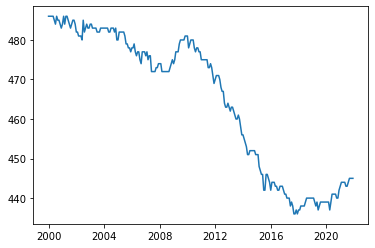

In [301]:
df_FundamentalRatios_dates["is_member"] = ( (df_FundamentalRatios_dates["public_date"] >= df_FundamentalRatios_dates["start"]) & 
                                           (df_FundamentalRatios_dates["public_date"] <= df_FundamentalRatios_dates["ending"]))
df_test = df_FundamentalRatios_dates[df_FundamentalRatios_dates["is_member"] == True]
plt.plot(sorted(df_test["month"].unique().to_timestamp()),df_test.groupby("month").apply(len))


# 4) Price Data
- compustat: https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/security-monthly/
- Optionmetrics: https://wrds-www.wharton.upenn.edu/pages/get-data/optionmetrics/ivy-db-us/securities/security-prices/

In [273]:
ccmxpf = pd.read_sas("CorrectMembers/ccmxpf_linktable.sas7bdat")
ccmxpf = ccmxpf.dropna(subset = ["lpermno"]).reset_index(drop=True)
ccmxpf["gvkey"] = ccmxpf["gvkey"].astype(str).str[2:-1].astype(int)
ccmxpf = ccmxpf[["gvkey","lpermno"]]
ccmxpf

,gvkey,lpermno
0,1000,25881.0
1,1001,10015.0
2,1002,10023.0
3,1003,10031.0
4,1004,54594.0
...,...,...
37827,348892,20846.0
37828,349530,17324.0
37829,349972,15642.0
37830,350681,22205.0


In [282]:
df_PriceData = pd.read_csv("FinalMembers/Saved_PriceCusip.csv").iloc[:,1:]
df_PriceData["month"] = pd.to_datetime(df_PriceData["datadate"]).dt.to_period('M')
df_PriceData.rename(columns={'cusip':'CUSIP','tic':'TICKER'}, inplace=True)
df_PriceData["CUSIP"] = df_PriceData["CUSIP"].astype(str).str[:-1]
df_PriceData

C:\Users\pyliu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gvkey,iid,datadate,TICKER,CUSIP,conm,ajexm,cshtrm,curcdm,prccm,trfm,trt1m,cshom,ggroup,gind,gsector,gsubind,month
0,1013,01,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,65.9375,1.0000,-9.1301,151467000.0,4520,452010,45,45201020,2000-01
1,1013,01,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,44.8750,1.0000,36.1137,302934000.0,4520,452010,45,45201020,2000-02
2,1013,01,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,53.8750,1.0000,20.0557,305747000.0,4520,452010,45,45201020,2000-03
3,1013,01,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,60.7500,1.0000,12.7610,305747000.0,4520,452010,45,45201020,2000-04
4,1013,01,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,67.1875,1.0000,10.5967,305747000.0,4520,452010,45,45201020,2000-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215871,326688,1,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,35.4500,1.1060,10.1918,168237000.0,2010,201040,20,20104010,2021-10
215872,326688,1,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,34.8300,1.1060,-1.7489,168237000.0,2010,201040,20,20104010,2021-11
215873,326688,1,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,38.0000,1.1060,9.1013,168237000.0,2010,201040,20,20104010,2021-12
215874,326688,1,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,34.5900,1.1115,-8.5132,168237000.0,2010,201040,20,20104010,2022-01


In [283]:
df_PriceData = df_PriceData.merge(ccmxpf, on = "gvkey", how = "left")
df_PriceData = df_PriceData.drop_duplicates(subset = ["lpermno","datadate"])
df_PriceData.rename(columns={'lpermno':'PERMNO'}, inplace=True)
df_PriceData = df_PriceData.merge(msp500_unique, on = "PERMNO", how = "left")
df_PriceData.drop_duplicates(subset = ["PERMNO","month"])


,gvkey,iid,datadate,TICKER_x,CUSIP_x,conm,ajexm,cshtrm,curcdm,prccm,...,gsector,gsubind,month,PERMNO,start,ending,NAMEDT,NAMEENDT,CUSIP_y,TICKER_y
0,1013,01,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,65.9375,...,45,45201020,2000-01,50906.0,1999-08-02,2007-06-29,1986-04-01,2004-06-09,00088630,ADCT
1,1013,01,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,44.8750,...,45,45201020,2000-02,50906.0,1999-08-02,2007-06-29,1986-04-01,2004-06-09,00088630,ADCT
2,1013,01,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,53.8750,...,45,45201020,2000-03,50906.0,1999-08-02,2007-06-29,1986-04-01,2004-06-09,00088630,ADCT
3,1013,01,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,60.7500,...,45,45201020,2000-04,50906.0,1999-08-02,2007-06-29,1986-04-01,2004-06-09,00088630,ADCT
4,1013,01,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,67.1875,...,45,45201020,2000-05,50906.0,1999-08-02,2007-06-29,1986-04-01,2004-06-09,00088630,ADCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238609,326688,1,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,35.4500,...,20,20104010,2021-10,17676.0,2018-05-01,2018-05-01,2018-05-01,2019-09-16,G6700G10,NVT
238610,326688,1,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,34.8300,...,20,20104010,2021-11,17676.0,2018-05-01,2018-05-01,2018-05-01,2019-09-16,G6700G10,NVT
238611,326688,1,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,38.0000,...,20,20104010,2021-12,17676.0,2018-05-01,2018-05-01,2018-05-01,2019-09-16,G6700G10,NVT
238612,326688,1,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,34.5900,...,20,20104010,2022-01,17676.0,2018-05-01,2018-05-01,2018-05-01,2019-09-16,G6700G10,NVT


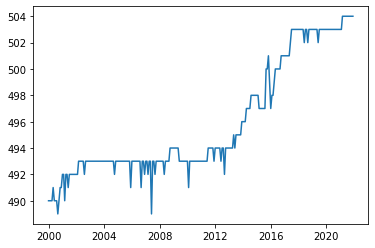

In [302]:
df_PriceData["is_member"] = ( (df_PriceData["datadate"] >= df_PriceData["start"]) & (df_PriceData["datadate"] <= df_PriceData["ending"]) )
df_test = df_PriceData[df_PriceData["is_member"] == True]
plt.plot(sorted(df_test["month"].unique().to_timestamp()),df_test.groupby("month").apply(len))


In [305]:
df_PriceData.columns
df_PriceData.rename(columns={'TICKER_x':'TICKER','CUSIP_x':'CUSIP'}, inplace=True)
df_PriceData = df_PriceData[['gvkey', 'datadate', 'TICKER', 'CUSIP', 'conm', 'ajexm',
       'cshtrm', 'curcdm', 'prccm', 'trfm', 'trt1m', 'cshom', 'ggroup', 'gind',
       'gsector', 'gsubind', 'month', 'PERMNO', 'start', 'ending', 'NAMEDT',
       'NAMEENDT', 'is_member']]
df_PriceData.to_csv("FinalMembers/df_PriceData")
df_PriceData

In [318]:
df_RatioPrice = copy(df_PriceData)
df_RatioPrice = df_RatioPrice.merge(df_FundamentalRatios, on = ["PERMNO","month"], how = "left")
df_RatioPrice

,gvkey,datadate,TICKER_x,CUSIP_x,conm,ajexm,cshtrm,curcdm,prccm,trfm,...,quick_ratio,curr_ratio,cash_conversion,at_turn,accrual,ptb,PEG_1yrforward,PEG_ltgforward,TICKER_y,CUSIP_y
0,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,65.9375,1.0000,...,1.902,2.493,121.799,1.296,0.165,7.999,5.153,4.521,ADCT,00088610
1,1013,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,44.8750,1.0000,...,1.902,2.493,121.799,1.296,0.165,10.888,7.014,6.120,ADCT,00088610
2,1013,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,53.8750,1.0000,...,1.843,2.525,103.546,1.518,0.086,11.691,7.951,8.417,ADCT,00088610
3,1013,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,60.7500,1.0000,...,1.843,2.525,103.546,1.518,0.086,13.346,5.103,9.288,ADCT,00088610
4,1013,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,67.1875,1.0000,...,1.843,2.525,103.546,1.518,0.086,14.760,5.643,10.173,ADCT,00088610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238611,326688,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,35.4500,1.1060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238612,326688,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,34.8300,1.1060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238613,326688,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,38.0000,1.1060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238614,326688,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,34.5900,1.1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


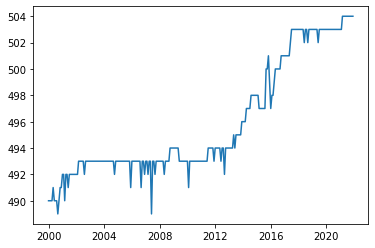

In [326]:
df_RatioPrice["is_member"] = ( (df_RatioPrice["datadate"] >= df_RatioPrice["start"]) & (df_RatioPrice["datadate"] <= df_RatioPrice["ending"]) )
df_test = df_RatioPrice[df_RatioPrice["is_member"] == True]
plt.plot(sorted(df_test["month"].unique().to_timestamp()),df_test.groupby("month").apply(len))


In [329]:
df_RatioPrice.columns
df_RatioPrice.rename(columns={'TICKER_x':'TICKER','CUSIP_x':'CUSIP'}, inplace=True)
df_RatioPrice = df_RatioPrice[['gvkey', 'datadate', 'TICKER', 'CUSIP', 'conm', 'ajexm', 'cshtrm',
       'curcdm', 'prccm', 'trfm', 'trt1m', 'cshom', 'ggroup', 'gind',
       'gsector', 'gsubind', 'month', 'PERMNO', 'start', 'ending', 'NAMEDT',
       'NAMEENDT', 'is_member', 'evm',
       'pe_op_dil', 'pe_exi', 'ps', 'pcf', 'dpr', 'npm', 'roa', 'roe',
       'aftret_invcapx', 'debt_assets', 'de_ratio', 'quick_ratio',
       'curr_ratio', 'cash_conversion', 'at_turn', 'accrual', 'ptb',
       'PEG_1yrforward', 'PEG_ltgforward']]
df_RatioPrice.to_csv("df_RatioPrice.csv")
df_RatioPrice


,gvkey,datadate,TICKER,CUSIP,conm,ajexm,cshtrm,curcdm,prccm,trfm,...,debt_assets,de_ratio,quick_ratio,curr_ratio,cash_conversion,at_turn,accrual,ptb,PEG_1yrforward,PEG_ltgforward
0,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,65.9375,1.0000,...,0.253,0.340,1.902,2.493,121.799,1.296,0.165,7.999,5.153,4.521
1,1013,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,44.8750,1.0000,...,0.253,0.340,1.902,2.493,121.799,1.296,0.165,10.888,7.014,6.120
2,1013,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,53.8750,1.0000,...,0.239,0.314,1.843,2.525,103.546,1.518,0.086,11.691,7.951,8.417
3,1013,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,60.7500,1.0000,...,0.239,0.314,1.843,2.525,103.546,1.518,0.086,13.346,5.103,9.288
4,1013,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,67.1875,1.0000,...,0.239,0.314,1.843,2.525,103.546,1.518,0.086,14.760,5.643,10.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238611,326688,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,35.4500,1.1060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238612,326688,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,34.8300,1.1060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238613,326688,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,38.0000,1.1060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238614,326688,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,34.5900,1.1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5) Analyst estimates
-  https://wrds-www.wharton.upenn.edu/pages/get-data/ibes-thomson-reuters/ibes-academic/unadjusted-summary/price-target/

In [337]:
df_AnalystEstimates = pd.read_csv("FinalMembers/EstimatesCusip.csv")
df_AnalystEstimates["month"] = pd.to_datetime(df_AnalystEstimates["STATPERS"]).dt.to_period('M')
df_AnalystEstimates.rename(columns={'TICKER':'tic'}, inplace=True)
df_AnalystEstimates.rename(columns={'OFTIC':'TICKER2'}, inplace=True)
df_AnalystEstimates = df_AnalystEstimates.merge(msp500_unique,on = "CUSIP", how = "inner")
df_AnalystEstimates
#df_AnalystEstimates.sort_values(["TICKER","month"])

,CUSIP,tic,TICKER2,CNAME,STATPERS,NUMEST,NUMUP4W,NUMDOWN4W,MEANPTG,MEDPTG,STDEV,CURR,month,PERMNO,start,ending,NAMEDT,NAMEENDT,TICKER
0,00088630,ADCT,ADCTD,ADC TELECOMMUNICATIONS INC,2005/05/19,10,1,3,37.075,21.0,61.351,USD,2005-05,50906,1999-08-02,2007-06-29,1986-04-01,2004-06-09,ADCT
1,00088630,ADCT,ADCT,ADC TELECOMMUNICATIONS INC,2005/06/16,10,5,1,25.125,25.5,3.098,USD,2005-06,50906,1999-08-02,2007-06-29,1986-04-01,2004-06-09,ADCT
2,00088630,ADCT,ADCT,ADC TELECOMMUNICATIONS INC,2005/07/14,11,0,0,24.932,25.0,3.009,USD,2005-07,50906,1999-08-02,2007-06-29,1986-04-01,2004-06-09,ADCT
3,00088630,ADCT,ADCT,ADC TELECOMMUNICATIONS INC,2005/08/18,10,5,0,26.950,27.5,3.218,USD,2005-08,50906,1999-08-02,2007-06-29,1986-04-01,2004-06-09,ADCT
4,00088630,ADCT,ADCT,ADC TELECOMMUNICATIONS INC,2005/09/15,12,1,5,25.729,25.5,2.922,USD,2005-09,50906,1999-08-02,2007-06-29,1986-04-01,2004-06-09,ADCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164503,V7780T10,RCL,RCL,ROYAL CARIBBEAN CRUISES LTD,2021/08/19,13,0,4,91.308,92.0,21.998,USD,2021-08,79145,2014-12-05,2021-12-31,1993-04-28,2002-01-01,RCL
164504,V7780T10,RCL,RCL,ROYAL CARIBBEAN CRUISES LTD,2021/09/16,13,1,0,91.538,92.0,21.885,USD,2021-09,79145,2014-12-05,2021-12-31,1993-04-28,2002-01-01,RCL
164505,V7780T10,RCL,RCL,ROYAL CARIBBEAN CRUISES LTD,2021/10/14,13,2,1,93.077,92.0,21.952,USD,2021-10,79145,2014-12-05,2021-12-31,1993-04-28,2002-01-01,RCL
164506,V7780T10,RCL,RCL,ROYAL CARIBBEAN CRUISES LTD,2021/11/18,13,4,2,94.615,94.0,19.393,USD,2021-11,79145,2014-12-05,2021-12-31,1993-04-28,2002-01-01,RCL


# 6) Merge dataframes + Macro data

In [371]:
#merge
df_Merge = copy(df_RatioPrice)
df_Merge = df_Merge.merge(df_AnalystEstimates, on = ["PERMNO","month"], how = "left")
df_Merge.sort_values("month")

,gvkey,datadate,TICKER_x,CUSIP_x,conm,ajexm,cshtrm,curcdm,prccm,trfm,...,NUMDOWN4W,MEANPTG,MEDPTG,STDEV,CURR,start_y,ending_y,NAMEDT_y,NAMEENDT_y,TICKER_y
0,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,65.9375,1.0000,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN
124080,11555,2000/01/31,TEG,45822P10,INTEGRYS HOLDING INC,1.0000,1109000.0,USD,25.3125,13.4816,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN
207021,66708,2000/01/31,BRCM,11132010,BROADCOM CORP,3.0000,46706900.0,USD,289.3125,1.0000,...,1.0,282.091,350.00,130.437,USD,2000-07-03,2016-01-29,1998-04-17,2004-06-09,BRCM
18181,2393,2000/01/31,BGGSQ,10904310,BRIGGS & STRATTON,2.0000,2681500.0,USD,44.3750,5.8973,...,1.0,68.750,68.75,12.374,USD,1968-04-04,2001-04-02,1968-01-02,2002-01-01,BGG
55077,5439,2000/01/31,HAL,40621610,HALLIBURTON CO,2.0000,71039300.0,USD,36.1250,3.0017,...,1.0,51.889,51.00,6.833,USD,1957-03-01,2021-12-31,1968-01-02,2002-01-01,HAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11135,1913,2022/03/31,AVY,05361110,AVERY DENNISON CORP,1.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN
164812,24800,2022/03/31,QCOM,74752510,QUALCOMM INC,1.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN
89243,8214,2022/03/31,OC,69074210,OWENS CORNING,1.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN
45055,4517,2022/03/31,NEE.PP,65339F77,NEXTERA ENERGY INC,1.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN


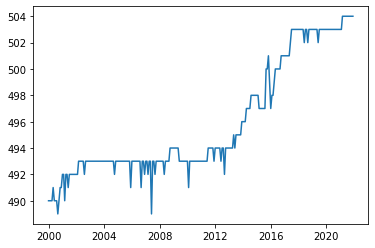

In [372]:
df_Merge["is_member"] = ( (df_Merge["datadate"] >= df_Merge["start_x"]) & (df_Merge["datadate"] <= df_Merge["ending_x"]) )
df_test = df_Merge[df_Merge["is_member"] == True]
df_test = df_test.drop_duplicates(subset = ["PERMNO","month"])
plt.plot(sorted(df_test["month"].unique().to_timestamp()),df_test.groupby("month").apply(len))


In [373]:
df_Merge.columns
df_Merge.rename(columns={'TICKER_x':'TICKER','CUSIP_x':'CUSIP',
                             'start_x':'start', 'ending_x':'ending'}, inplace=True)
df_Merge = df_Merge[['gvkey', 'datadate', 'TICKER', 'CUSIP', 'conm', 'ajexm', 'cshtrm',
       'curcdm', 'prccm', 'trfm', 'trt1m', 'cshom', 'ggroup', 'gind',
       'gsector', 'gsubind', 'month', 'PERMNO', 'start', 'ending',
       'is_member', 'evm', 'pe_op_dil', 'pe_exi',
       'ps', 'pcf', 'dpr', 'npm', 'roa', 'roe', 'aftret_invcapx',
       'debt_assets', 'de_ratio', 'quick_ratio', 'curr_ratio',
       'cash_conversion', 'at_turn', 'accrual', 'ptb', 'PEG_1yrforward',
       'PEG_ltgforward', 'CNAME', 'STATPERS',
       'NUMEST', 'NUMUP4W', 'NUMDOWN4W', 'MEANPTG', 'MEDPTG', 'STDEV', 'CURR']]
df_Merge.to_csv("FinalMembers/df_Merge")
df_Merge

,gvkey,datadate,TICKER,CUSIP,conm,ajexm,cshtrm,curcdm,prccm,trfm,...,PEG_ltgforward,CNAME,STATPERS,NUMEST,NUMUP4W,NUMDOWN4W,MEANPTG,MEDPTG,STDEV,CURR
0,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,65.9375,1.0000,...,4.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1013,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,44.8750,1.0000,...,6.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1013,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,53.8750,1.0000,...,8.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1013,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,60.7500,1.0000,...,9.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,67.1875,1.0000,...,10.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244793,326688,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,35.4500,1.1060,...,NaN,NVENT ELECTRIC PLC,2021/10/14,6.0,0.0,1.0,41.000,40.0,4.290,USD
244794,326688,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,34.8300,1.1060,...,NaN,NVENT ELECTRIC PLC,2021/11/18,6.0,4.0,0.0,42.500,41.0,4.637,USD
244795,326688,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,38.0000,1.1060,...,NaN,NVENT ELECTRIC PLC,2021/12/16,6.0,1.0,0.0,42.667,41.5,4.633,USD
244796,326688,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,34.5900,1.1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


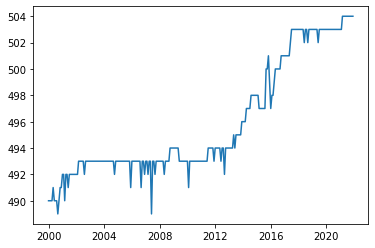

In [374]:
df_test = df_Merge[df_Merge["is_member"] == True]
df_test = df_test.drop_duplicates(subset = ["PERMNO","month"])
plt.plot(sorted(df_test["month"].unique().to_timestamp()),df_test.groupby("month").apply(len))

In [376]:
1-df_test.isna().sum()/len(df_test)

gvkey              1.000000
datadate           1.000000
TICKER             1.000000
CUSIP              1.000000
conm               1.000000
ajexm              0.999969
cshtrm             0.999969
curcdm             0.999969
prccm              0.999969
trfm               1.000000
trt1m              0.999832
cshom              0.999924
ggroup             1.000000
gind               1.000000
gsector            1.000000
gsubind            1.000000
month              1.000000
PERMNO             1.000000
start              1.000000
ending             1.000000
is_member          1.000000
evm                0.922613
pe_op_dil          0.911935
pe_exi             0.911797
ps                 0.926295
pcf                0.925661
dpr                0.860305
npm                0.926295
roa                0.925615
roe                0.906305
aftret_invcapx     0.912515
debt_assets        0.926028
de_ratio           0.926005
quick_ratio        0.787532
curr_ratio         0.787532
cash_conversion    0

In [377]:
temp = df_Merge.pop('month')
df_Merge.insert(0, 'month', temp)
temp = df_Merge.pop('PERMNO')
df_Merge.insert(0, 'PERMNO', temp)
df_Merge = df_Merge.drop(labels = ["cash_conversion", "curr_ratio", "quick_ratio", "PEG_ltgforward", "dpr", "PEG_1yrforward",
                        "STATPERS","CNAME"],axis = 1)
df_Merge

,PERMNO,month,gvkey,datadate,TICKER,CUSIP,conm,ajexm,cshtrm,curcdm,...,at_turn,accrual,ptb,NUMEST,NUMUP4W,NUMDOWN4W,MEANPTG,MEDPTG,STDEV,CURR
0,50906.0,2000-01,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,...,1.296,0.165,7.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50906.0,2000-02,1013,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,...,1.296,0.165,10.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50906.0,2000-03,1013,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,...,1.518,0.086,11.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50906.0,2000-04,1013,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,...,1.518,0.086,13.346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50906.0,2000-05,1013,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,...,1.518,0.086,14.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244793,17676.0,2021-10,326688,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,...,NaN,NaN,NaN,6.0,0.0,1.0,41.000,40.0,4.290,USD
244794,17676.0,2021-11,326688,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,...,NaN,NaN,NaN,6.0,4.0,0.0,42.500,41.0,4.637,USD
244795,17676.0,2021-12,326688,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,...,NaN,NaN,NaN,6.0,1.0,0.0,42.667,41.5,4.633,USD
244796,17676.0,2022-01,326688,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
macro = ["CPI", "FedFundsTargetRate", "GDP", "MedianHomeSalesPrice", 
         "NonFarmPayrolls", "PMI", "PPI", "PrivateHousingStarts", "Unemployment"]

for ratio in macro:
    readname = "MacroData/df_US_" + ratio + ".pkl"
    df_temp = pd.read_pickle(readname)
    if ratio == "PPI":   #PPI had different format
        df_temp = df_temp[1:]
        df_temp.columns = ["year", "m", "month", "PPI"]
        df_temp = df_temp[["month", "PPI"]]
        df_temp["month"] = pd.to_datetime(df_temp["month"]).dt.to_period('M')
    elif ratio == "GDP":
        df_temp.columns = ["date", ratio]
        df_temp["date"] = pd.to_datetime(df_temp["date"])   #format date
        df_temp["month"] = df_temp['date'].dt.to_period('M')   #nearest month
        df_temp = df_temp[["month", ratio]]
        df_temp = df_temp.set_index('month').resample('M').interpolate().reset_index()
    else:
        df_temp.columns = ["date", ratio]
        df_temp["date"] = pd.to_datetime(df_temp["date"])   #format date
        df_temp["month"] = df_temp['date'].dt.to_period('M')   #nearest month
        df_temp = df_temp[["month", ratio]]
    df_Merge = df_Merge.merge(df_temp, on = ["month"], how = "left")

df_Merge.to_csv("FinalMembers/df_Merge.csv")
df_Merge

,PERMNO,month,gvkey,datadate,TICKER,CUSIP,conm,ajexm,cshtrm,curcdm,...,CURR,CPI,FedFundsTargetRate,GDP,MedianHomeSalesPrice,NonFarmPayrolls,PMI,PPI,PrivateHousingStarts,Unemployment
0,50906.0,2000-01,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,...,NaN,2.74,5.500000,12903938.0,163500.0,131005000.0,56.7,128.3,1.94,4.0
1,50906.0,2000-02,1013,2000/02/29,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,80410800.0,USD,...,NaN,3.22,5.741379,12919595.0,162400.0,131124000.0,55.8,129.8,2.03,4.1
2,50906.0,2000-03,1013,2000/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,83735700.0,USD,...,NaN,3.76,5.838710,12935252.0,165100.0,131596000.0,54.9,130.8,1.89,4.0
3,50906.0,2000-04,1013,2000/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,82034700.0,USD,...,NaN,3.07,6.000000,13013751.0,162600.0,131888000.0,54.7,130.7,1.90,3.8
4,50906.0,2000-05,1013,2000/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.2857,119334400.0,USD,...,NaN,3.19,6.258065,13092250.0,164700.0,132105000.0,53.2,131.6,1.84,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244793,17676.0,2021-10,326688,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15746381.0,USD,...,USD,6.22,0.250000,19587916.0,421500.0,148503000.0,60.8,240.446,1.66,4.6
244794,17676.0,2021-11,326688,2021/11/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,15853721.0,USD,...,USD,6.81,0.250000,19696939.0,416100.0,148752000.0,60.6,243.174,1.79,4.2
244795,17676.0,2021-12,326688,2021/12/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,20335290.0,USD,...,USD,7.04,0.250000,19805962.0,377700.0,148951000.0,58.8,241.017,NaN,3.9
244796,17676.0,2022-01,326688,2022/01/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,16168727.0,USD,...,NaN,NaN,0.250000,NaN,NaN,NaN,57.6,NaN,NaN,NaN


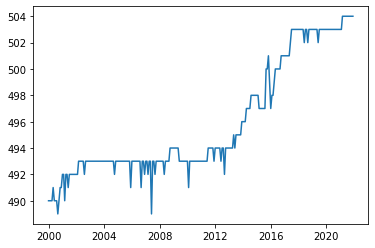

In [379]:
df_test = df_Merge[df_Merge["is_member"] == True]
df_test = df_test.drop_duplicates(subset = ["PERMNO","month"])
plt.plot(sorted(df_test["month"].unique().to_timestamp()),df_test.groupby("month").apply(len))

In [380]:
df_Merge.columns

Index(['PERMNO', 'month', 'gvkey', 'datadate', 'TICKER', 'CUSIP', 'conm',
       'ajexm', 'cshtrm', 'curcdm', 'prccm', 'trfm', 'trt1m', 'cshom',
       'ggroup', 'gind', 'gsector', 'gsubind', 'start', 'ending', 'is_member',
       'evm', 'pe_op_dil', 'pe_exi', 'ps', 'pcf', 'npm', 'roa', 'roe',
       'aftret_invcapx', 'debt_assets', 'de_ratio', 'at_turn', 'accrual',
       'ptb', 'NUMEST', 'NUMUP4W', 'NUMDOWN4W', 'MEANPTG', 'MEDPTG', 'STDEV',
       'CURR', 'CPI', 'FedFundsTargetRate', 'GDP', 'MedianHomeSalesPrice',
       'NonFarmPayrolls', 'PMI', 'PPI', 'PrivateHousingStarts',
       'Unemployment'],
      dtype='object')

In [381]:
(df_Merge.count()/len(df_Merge)).sort_values(ascending = False)

PERMNO                  1.000000
ggroup                  1.000000
is_member               1.000000
gsubind                 1.000000
gsector                 1.000000
gind                    1.000000
month                   1.000000
TICKER                  1.000000
conm                    1.000000
gvkey                   1.000000
datadate                1.000000
CUSIP                   1.000000
FedFundsTargetRate      0.999710
trfm                    0.999506
ajexm                   0.999007
curcdm                  0.998431
prccm                   0.998419
trt1m                   0.998333
PMI                     0.996569
cshom                   0.996438
cshtrm                  0.995261
CPI                     0.993411
PPI                     0.993411
NonFarmPayrolls         0.993411
MedianHomeSalesPrice    0.993411
GDP                     0.993411
Unemployment            0.993411
PrivateHousingStarts    0.990118
start                   0.884852
ending                  0.884852
npm       

# 7) Format data for ML

In [422]:
df_all = copy(df_Merge)
company_name = "PERMNO"
# returns
df_all["mcap"] = df_all["prccm"] * df_all["cshom"]
#use 1m returns rather than prices
#df_all["price_adjusted"] = df_all["prccm"] /df_all["ajexm"]
df_all["return_1M"] = df_all["trt1m"]/100

#melt, then pivot to create price df
#prices = df_all.melt(id_vars = [company_name, "month"], value_vars = "price_adjusted", var_name = "price_adjusted")
#prices = prices.pivot_table(values = "value", index = "month", columns = company_name)
#returns = prices/prices.shift()-1
returns = df_all.melt(id_vars = [company_name, "month"], value_vars = "return_1M", var_name = "return_1M")
returns = returns.pivot_table(values = "value", index = "month", columns = company_name)

#rets over diff periods
#periods = [-1, 1,3,6,9,12]
#label = ["pred_target","return_1M","return_3M","return_6M","return_9M","return_12M"]
periods = [-1, 3,6,9,12]
label = ["pred_target","return_3M","return_6M","return_9M","return_12M"]
for j in range(len(periods)):
    i = periods[j]
    if i> 0:
        ret = (1+returns).rolling(window=i).apply(np.prod, raw=True) - 1
        df_melt = ret.melt(var_name = company_name, value_name = label[j], ignore_index = False)
        df_all = df_all.merge(df_melt, on = [company_name, "month"],how = "left")
    elif i < 0:
        ret = ((1+returns).rolling(window=-i, axis = 0).apply(np.prod, raw=True) - 1).shift(i)
        df_melt = ret.melt(var_name = company_name, value_name = label[j], ignore_index = False)
        df_all = df_all.merge(df_melt, on = [company_name, "month"],how = "left")
        
df_all.sort_values("month")

,PERMNO,month,gvkey,datadate,TICKER,CUSIP,conm,ajexm,cshtrm,curcdm,...,PPI,PrivateHousingStarts,Unemployment,mcap,return_1M,pred_target,return_3M,return_6M,return_9M,return_12M
0,50906.0,2000-01,1013,2000/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.5714,31103000.0,USD,...,128.3,1.94,4.0,9.987355e+09,-0.091301,0.361137,NaN,NaN,NaN,NaN
124080,25099.0,2000-01,11555,2000/01/31,TEG,45822P10,INTEGRYS HOLDING INC,1.0000,1109000.0,USD,...,128.3,1.94,4.0,6.791597e+08,0.007463,-0.049185,NaN,NaN,NaN,NaN
207021,85963.0,2000-01,66708,2000/01/31,BRCM,11132010,BROADCOM CORP,3.0000,46706900.0,USD,...,128.3,1.94,4.0,1.513741e+10,0.062184,0.364442,NaN,NaN,NaN,NaN
18181,17961.0,2000-01,2393,2000/01/31,BGGSQ,10904310,BRIGGS & STRATTON,2.0000,2681500.0,USD,...,128.3,1.94,4.0,1.026571e+09,-0.172494,-0.239718,NaN,NaN,NaN,NaN
55077,23819.0,2000-01,5439,2000/01/31,HAL,40621610,HALLIBURTON CO,2.0000,71039300.0,USD,...,128.3,1.94,4.0,1.595836e+10,-0.102484,0.060554,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11135,44601.0,2022-03,1913,2022/03/31,AVY,05361110,AVERY DENNISON CORP,1.0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164812,77178.0,2022-03,24800,2022/03/31,QCOM,74752510,QUALCOMM INC,1.0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89243,91531.0,2022-03,8214,2022/03/31,OC,69074210,OWENS CORNING,1.0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45055,24205.0,2022-03,4517,2022/03/31,NEE.PP,65339F77,NEXTERA ENERGY INC,1.0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [423]:
df_nn = copy(df_all)
#Convert indices to 0-2
df_nn["PMI"] = df_nn["PMI"]/100
df_nn["PPI"] = df_nn["PPI"].astype(float)/100

#one hot encode sectors
df_nn["gsector"] = df_nn["gsector"]/5 - 2

#growth measures
df_nn.rename(columns={'cshtrm':'volume'}, inplace=True)
growth_measures = ["GDP", "MedianHomeSalesPrice", "PrivateHousingStarts","NonFarmPayrolls", "volume"]
for ratio in growth_measures:
    if ratio == "volume":  #no need for percentage. Normalise to a fraction
        df_nn[ratio] = df_nn.groupby(company_name)[ratio].apply(lambda x: (x.diff()[1:]/x.shift(1)))
    else:
        df_nn[ratio] = df_nn.groupby(company_name)[ratio].apply(lambda x: (100* x.diff()[1:]/x.shift(1)))

# medptg - adjusted to a return: slightly weird denominator for normalisation
df_nn["MEDPTG"] = np.exp((df_nn["MEDPTG"] - df_nn["prccm"])/df_nn["MEDPTG"])

# convert analyst up/down to percentage
df_nn["PCTUP4W"] = df_nn["NUMUP4W"]/df_nn["NUMEST"]   #use 4 weeks since there are granularity issues with 1M (e.g. NUMDOWN1M > NUMEST for index 180834)
df_nn["PCTDOWN4W"] = df_nn["NUMDOWN4W"]/df_nn["NUMEST"]


#remove first 12 months & last month
df_nn = df_nn[(df_nn["month"]>= "2001-01") & (df_nn["month"]<= "2021-11")].reset_index(drop = True)
df_nn

,PERMNO,month,gvkey,datadate,TICKER,CUSIP,conm,ajexm,volume,curcdm,...,Unemployment,mcap,return_1M,pred_target,return_3M,return_6M,return_9M,return_12M,PCTUP4W,PCTDOWN4W
0,50906.0,2001-01,1013,2001/01/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.1429,0.676919,USD,...,4.2,1.131958e+10,-0.196552,-0.236052,-0.318714,-0.652757,-0.520576,-0.116589,NaN,NaN
1,50906.0,2001-02,1013,2001/02/28,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.1429,-0.380785,USD,...,4.2,8.647574e+09,-0.236052,-0.235955,-0.448917,-0.728245,-0.668838,-0.504179,NaN,NaN
2,50906.0,2001-03,1013,2001/03/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.1429,-0.083242,USD,...,4.3,6.643583e+09,-0.235955,-0.116471,-0.531035,-0.683905,-0.797318,-0.684455,NaN,NaN
3,50906.0,2001-04,1013,2001/04/30,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.1429,0.016306,USD,...,4.4,5.869801e+09,-0.116471,0.022636,-0.484292,-0.648656,-0.820924,-0.752758,NaN,NaN
4,50906.0,2001-05,1013,2001/05/31,ADCT.1,00088630,ADC TELECOMMUNICATIONS INC,0.1429,0.274086,USD,...,4.3,6.002673e+09,0.022636,-0.140625,-0.309664,-0.619567,-0.812397,-0.771387,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230554,17676.0,2021-07,326688,2021/07/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,0.056392,USD,...,5.4,5.300302e+09,0.017446,0.086998,0.043843,0.428403,0.784910,0.791298,0.428571,0.000000
230555,17676.0,2021-08,326688,2021/08/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,-0.015458,USD,...,5.2,5.776157e+09,0.086998,-0.059080,0.061777,0.323260,0.522631,0.849374,0.857143,0.000000
230556,17676.0,2021-09,326688,2021/09/30,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,-0.082508,USD,...,4.7,5.434899e+09,-0.059080,0.101918,0.040622,0.171474,0.414834,0.880778,0.142857,0.000000
230557,17676.0,2021-10,326688,2021/10/31,NVT,G6700G10,NVENT ELECTRIC PLC,1.0000,0.016887,USD,...,4.6,5.964002e+09,0.101918,-0.017489,0.127018,0.176429,0.609836,1.011625,0.000000,0.166667


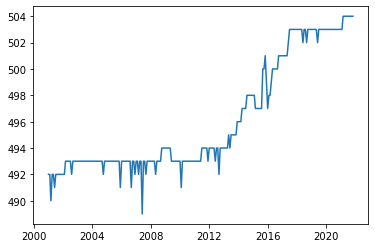

In [424]:
df_nn = df_nn[df_nn["is_member"] == True]
df_nn = df_nn.drop_duplicates(subset = ["PERMNO","month"])
plt.plot(sorted(df_nn["month"].unique().to_timestamp()),df_nn.groupby("month").apply(len))

In [425]:
#remove unnecessary columns
valid_cols = [company_name, "month", "pred_target","mcap","gsector",
              "debt_assets", "de_ratio", "evm", "pe_exi", 
              "roe", "npm","ps", "ptb", "pcf", "aftret_invcapx",
              "CPI", "PMI", "PPI", "FedFundsTargetRate", "GDP", 
              "MedianHomeSalesPrice", "PrivateHousingStarts","NonFarmPayrolls", "Unemployment",
            "MEDPTG", "PCTUP4W", "PCTDOWN4W", "volume","gsector",
             "return_1M", "return_3M", "return_6M", "return_9M", "return_12M"]

df_nn = df_nn[valid_cols]
#remove critical nans
df_nn = df_nn.dropna(axis = 0, subset =["pred_target", "return_1M", "return_3M", "return_6M", "return_9M", "return_12M"])

#fill nans with mean
df_nn.iloc[:,2:]=df_nn.iloc[:,2:].replace(np.nan, df_nn.iloc[:,2:].mean(axis = 0))

#remove 1month ret > 10. That may be noise (e.g. monthly ret of 199!)
df_nn = df_nn[df_nn["pred_target"] < 10]
df_nn = df_nn[df_nn["return_1M"] < 10]


#save
df_nn.to_pickle("FinalMembers/df_NeuralNetworkFeatures.pkl")
df_nn.to_csv("FinalMembers/df_NeuralNetworkFeatures.csv")
df_nn

,PERMNO,month,pred_target,mcap,gsector,debt_assets,de_ratio,evm,pe_exi,roe,...,MEDPTG,PCTUP4W,PCTDOWN4W,volume,gsector,return_1M,return_3M,return_6M,return_9M,return_12M
0,50906.0,2001-01,-0.236052,1.131958e+10,7.0,0.266000,0.363000,24.638000,12.887000,0.417000,...,1.112445,0.155936,0.091307,0.676919,7.0,-0.196552,-0.318714,-0.652757,-0.520576,-0.116589
1,50906.0,2001-02,-0.235955,8.647574e+09,7.0,0.266000,0.363000,24.638000,9.845000,0.417000,...,1.112445,0.155936,0.091307,-0.380785,7.0,-0.236052,-0.448917,-0.728245,-0.668838,-0.504179
2,50906.0,2001-03,-0.116471,6.643583e+09,7.0,0.283000,0.396000,27.653000,55.607000,0.361000,...,1.112445,0.155936,0.091307,-0.083242,7.0,-0.235955,-0.531035,-0.683905,-0.797318,-0.684455
3,50906.0,2001-04,0.022636,5.869801e+09,7.0,0.283000,0.396000,27.653000,49.131000,0.361000,...,1.112445,0.155936,0.091307,0.016306,7.0,-0.116471,-0.484292,-0.648656,-0.820924,-0.752758
4,50906.0,2001-05,-0.140625,6.002673e+09,7.0,0.283000,0.396000,27.653000,50.243000,0.361000,...,1.112445,0.155936,0.091307,0.274086,7.0,0.022636,-0.309664,-0.619567,-0.812397,-0.771387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230510,14297.0,2021-07,0.054100,1.225247e+10,2.0,0.631538,2.950912,13.618522,19.769727,0.180477,...,1.083433,0.200000,0.000000,0.143727,2.0,-0.019383,0.019147,0.283483,0.398204,0.389188
230511,14297.0,2021-08,-0.079519,1.291533e+10,2.0,0.631538,2.950912,13.618522,19.769727,0.180477,...,1.057390,0.600000,0.000000,-0.226141,2.0,0.054100,0.027635,0.330905,0.273009,0.408682
230512,14297.0,2021-09,-0.029354,1.185602e+10,2.0,0.631538,2.950912,13.618522,19.769727,0.180477,...,1.142531,0.100000,0.000000,0.336216,2.0,-0.079519,-0.048528,0.057814,0.145072,0.351025
230513,14297.0,2021-10,-0.036321,1.150800e+10,2.0,0.631538,2.950912,13.618522,19.769727,0.180477,...,1.142373,0.000000,0.454545,-0.058491,2.0,-0.029354,-0.058203,-0.040170,0.208781,0.316825


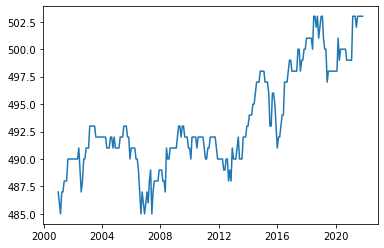

In [426]:
plt.plot(sorted(df_nn["month"].unique().to_timestamp()),df_nn.groupby("month").apply(len))